# Logistic Regression

## Logistic Regression 모델
> **`Logistic Regression`** 은 **분류**를 위한 **지도학습** 머신러닝 모델이다.  
**종속변수가 이진형 분포**를 보일경우 기존 선형모델로는 해결이 어려움이 있음.  
클래스가 여러개인 분류문제에도 사용이 가능하지만 이진형 데이터(바이너리) 종속변수 분류문제를 해결하는데 주로 사용.  
ex) 남/여, 개/고양이, OK/NG, 햄메일/스팸메일, 승인/반려

<img src="./image/19.png">

위 그림에서 확인 할 수 있듯 기존 선형모델이 풀기 어려운 이진분류 문제를 해결하고자 선형을 비선형으로 변환한 모델이다.  
만약 모델(함수)의 출력결과를 0과 1사이로 만들어 줄 수 있다면 즉, 확률 문제로서 접근한다면 분류문제에 사용 가능 하겠다는 아이디어에서 변형 되었다.

## Odds (승산비)
- 로지스틱회귀 모델을 확률로서 접근하는데 가장 핵심적인 개념  
  
$$ p : 어떤\ 일이\ 발생할\ 확률\ (승산) $$  
$$ Odds = {p \over {1-p}} : \  어떤\ 일이\ 발생할\ 확률\ / 발생하지\ 않을\ 확률\ (승산비)$$  

> 0 < p < 1  
0 < 1-p < 1  
p가 0에 가까울 경우 0  
p가 1에 가까울 경우 무한대  
  
위의 Odds를 그대로 사용하지 않고 log를 취해 사용하면 0을 기준으로 상호대칭적이며, 계산이 수월한 수식이 완성 됩니다.  
기존 선형회귀식에서 y위치에 log Odds를 적용하면 아래와 같은 식이 되고  
  
$$ log({Y \over {1-Y}}) = \beta_0 + \beta_1x$$  
  
이를 다시 y에 대해 정리하면 sigmoid 식이 됩니다.  
  
$$ y = {1 \over {1+\exp^{-(\beta_0 + \beta_1x)}}} $$  

<img src="./image/20.png">

결국 로지스틱 회귀 모델도 $\beta_0$와 $\beta_1$ 를 추정하게 됩니다.
> 0 < sigmoid(x) < 1  
sigmoid(0) = 0.5  
곧 시그모이드 함수를 거친 값을 확률값처럼 생각이 가능해짐

$$ \hat{y} = \begin{cases} 1 & \text{ if } \ h(x) \geq 0.5 \\ 0 & \text{ if } \ h(x) < 0.5 \end{cases} $$

## 모델학습

### cost function

로지스틱 회귀모델의 비용함수는 각 가정에 따른 y의 결과값에 따라 서로 다른 함수를 갖게 됩니다.

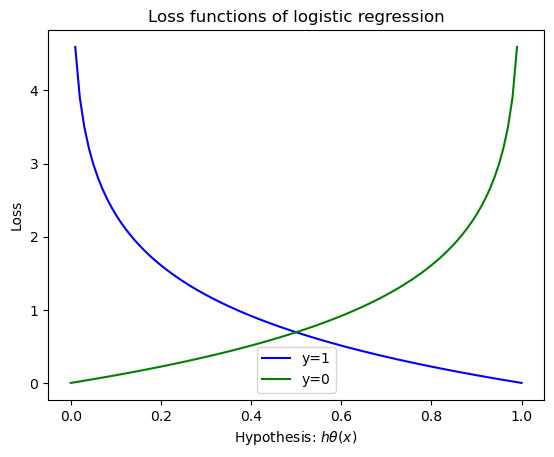

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

x = np.linspace(0, 1, 100)
y1 = 0 - np.log(x)
y0 = 0 - np.log(1 - x)

plt.plot(x, y1, 'b', label='y=1')
plt.plot(x, y0, 'g', label='y=0')
plt.title('Loss functions of logistic regression')
plt.xlabel('Hypothesis: $h\\theta(x)$')
plt.ylabel('Loss')
plt.legend()
plt.show()

이를 방정식으로 풀어내면 하나의 식으로 정리가 됩니다.

$$ cost(h(x),y) = -ylog(h(x)) - (1-y)log(1-h(x)) $$

$$ J(\theta)= \dfrac{1}{N} \sum_{i=1}^N[-y^ilog(h(x^i)) - (1-y^i)log(1-h(x^i))] $$

$$ \dfrac{\partial{J(\theta)}}{\partial \theta_j} = \dfrac{1}{N} \sum_{i=1}^N (h(x^i) - y^i)x_j^i$$

비용함수 편미분 과정 참고 : https://wikidocs.net/4289

## 모델평가
> 예측모델인 **`linear regression`** 모델의 경우 최소자승법을 통해 모델을 평가하였다.  
분류모델인 **`logistic regression`** 모델은 분류모델 평가 지표를 사용하여 모델을 평가한다.  
대표적인 모델평가 함수인 **오차행렬(confusion matrix)** 와 **분류평가표(classification report)** 를 사용한다.

### 오차행렬(confusion matrix)
<img src="./image/21.png">  

TP - True Positive(실제값 1, 예측값 1로 정분류 된 갯수)  
FN - False Negative(실제값 1, 예측값 0으로 오분류 된 갯수)  
FP - Flase Positive(실제값 0, 예측값 1로 오분류 된 갯수)  
TN - True Negative(실제값 0, 예측값 0으로 정분류 된 갯수)

### 정확도(Accuracy) - 전체 샘플 중 모델이 바르게 분류한 비율
<img src="./image/22.png">  

$${TP + TN \over TP + FN + FP + TN}$$

### 정밀도(Precision) - 모델이 positive로 분류한 것 중 실제값이 positive이 비율
<img src="./image/23.png">  

$${TP \over TP + FP}$$

### 재현율(Recall) - 실제값이 positive인 것 중 모델이 positive라 분류한 비율
<img src="./image/24.png">  

$${TP \over TP + FN}$$

### f1-score - precision과 recall의 조화평균
<img src="./image/25.png">    

$${2 * precision * recall \over precision + recall}$$  

## 로지스틱회귀 실습

In [2]:
# 필요모듈 import
import pandas as pd
from sklearn.datasets import load_breast_cancer
# sklearn 유방암 데이터셋 활용

In [3]:
# 데이터 로드
cancer = load_breast_cancer()

In [7]:
# 데이터 설명 출력
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [10]:
# X, 설명변수 이름값 확인
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
# 로딩 데이터 확인
X = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
y = cancer['target']

In [15]:
# 데이터 분할
from sklearn.model_selection import train_test_split
# 훈련과 테스트셋에서의 레이블의 분포가 동일하게 하라. (stratify=label)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

In [17]:
# 모델 import
from sklearn.linear_model import LogisticRegression

In [24]:
# 모델 생성
lr = LogisticRegression(random_state=42)

<img src="./image/26.png">

In [25]:
# 모델 훈련
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [26]:
# 모델 예측
pred = lr.predict(X_test)

In [31]:
lr.predict(X_test)

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [30]:
# 확률값 출력
lr.predict_proba(X_test)

array([[6.76671474e-01, 3.23328526e-01],
       [1.14857119e-02, 9.88514288e-01],
       [1.02934349e-03, 9.98970657e-01],
       [9.92649421e-01, 7.35057862e-03],
       [3.38058340e-01, 6.61941660e-01],
       [9.29905251e-01, 7.00947487e-02],
       [3.29424116e-04, 9.99670576e-01],
       [9.97924773e-01, 2.07522740e-03],
       [2.54274861e-03, 9.97457251e-01],
       [1.00000000e+00, 1.04818624e-12],
       [1.38290066e-03, 9.98617099e-01],
       [1.46038099e-02, 9.85396190e-01],
       [9.99080029e-01, 9.19970992e-04],
       [3.71779954e-01, 6.28220046e-01],
       [9.05798168e-03, 9.90942018e-01],
       [8.58037936e-01, 1.41962064e-01],
       [9.99999042e-01, 9.57532487e-07],
       [9.30281662e-03, 9.90697183e-01],
       [1.27410864e-03, 9.98725891e-01],
       [1.06858668e-01, 8.93141332e-01],
       [9.49299487e-03, 9.90507005e-01],
       [1.08108037e-01, 8.91891963e-01],
       [4.27194886e-02, 9.57280511e-01],
       [9.99995872e-01, 4.12765872e-06],
       [1.000000

In [27]:
# 모델 평가
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [28]:
# 오분류 보고서 출력
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 56   8]
 [  2 105]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        64
           1       0.93      0.98      0.95       107

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

